In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [8]:
#carregando os dados
csv_file_path = 'Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System.csv'
data = pd.read_csv(csv_file_path)

In [18]:
#verificando os dados
data.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Total,Total,OVR,OVERALL
1,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Male,GEN,MALE
2,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Female,GEN,FEMALE
3,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,Less than high school,EDU,EDUHS
4,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,High school graduate,EDU,EDUHSGRAD


In [20]:
#Selecionando apenas as colunas necessárias
df = data[['YearStart', 'Data_Value']].dropna()

In [11]:
#Dividindo os Dados em variáveis
X = df[['YearStart']]
y = df['Data_Value']

In [21]:
#Divivindo os dados em treinamentos e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
#Treinando o modelo da Regressão Linear
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [27]:
#Fazendo previsões no conjunto de teste
y_pred = model.predict(X_test)

In [32]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Mean Squared Error: 103.51646808877219
R² Score: -0.00017655683943984535


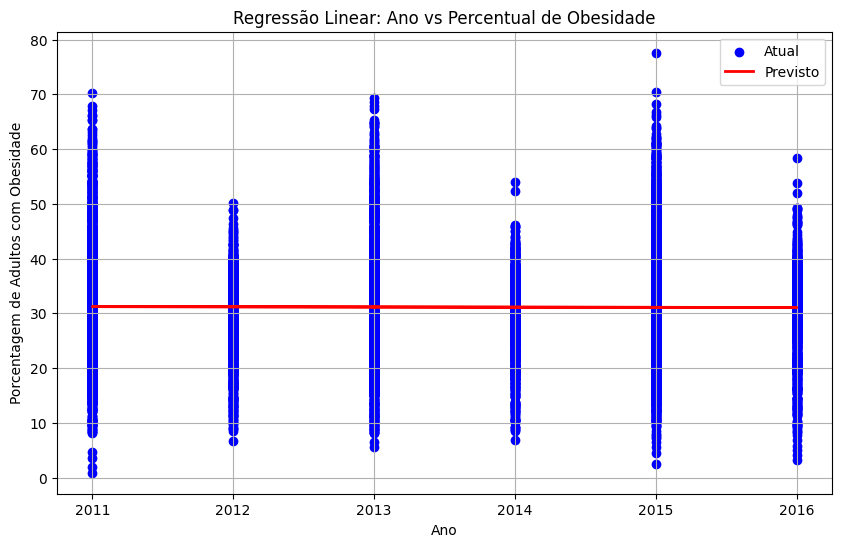

In [35]:
#Visualizando os resultados
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Atual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Previsto')
plt.xlabel('Ano')
plt.ylabel('Porcentagem de Adultos com Obesidade')
plt.title('Regressão Linear: Ano vs Percentual de Obesidade')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#Como conseguimos ver no gráfico, o previsto pela linha de regressão era que o percentual de adultos com obesidade ficaria na casa dos 30%, quando na verdade a média entre os anos seria uns 60% e um destaque preocupante para 2015 que quase chegou aos 80%.
